In [6]:
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from turfpy.measurement import centroid

In [7]:
df = gpd.read_file('/content/BREC Park.geojson')
df.head()

,bmx,city,croquet_court,bird_watching_wildlife_viewing,acreage,zip,disc_golf,swimming_pool,archery_range,walking_track_indoor,...,parkid,bg_id,sand_volleyball,cricket_pitch,mountain_biking,garden_arboretum,tennis_center,dog_park,recreation_center,geometry
0,NO,BATON ROUGE,NO,NO,1,70805,NO,NO,NO,NO,...,ACTWY,34,NO,NO,NO,NO,NO,NO,NO,"MULTIPOLYGON (((-91.15666 30.47296, -91.15665 ..."
1,NO,BATON ROUGE,NO,NO,133,70817,NO,NO,NO,NO,...,ARHWY,36,NO,NO,NO,NO,NO,NO,NO,"MULTIPOLYGON (((-91.00169 30.34969, -91.00261 ..."
2,NO,BATON ROUGE,NO,NO,3,70802,NO,NO,NO,NO,...,ALAST,38,NO,NO,NO,NO,NO,NO,YES,"MULTIPOLYGON (((-91.18515 30.42140, -91.18498 ..."
3,NO,BATON ROUGE,NO,NO,9,70805,NO,NO,NO,NO,...,ALXST,39,NO,NO,NO,NO,NO,NO,NO,"MULTIPOLYGON (((-91.16150 30.50460, -91.16150 ..."
4,NO,BATON ROUGE,NO,NO,20,70807,NO,NO,NO,NO,...,ALSEN,150,NO,NO,NO,YES,NO,NO,YES,"MULTIPOLYGON (((-91.19990 30.57320, -91.19986 ..."


In [10]:
df1 = gpd.read_file('/content/Fitness Center.geojson')
df['Area'] = 'Park'
df1['Area'] = 'Gym'
df1['facility_name'] = df1['business_name']
dataframesList = [df, df1]

In [11]:
df = gpd.GeoDataFrame(pd.concat(dataframesList, ignore_index=True))
df.crs
df = df.to_crs(epsg=4326)
df1.crs
df1 = df1.to_crs(epsg=4326)

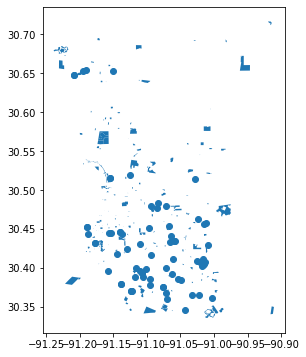

In [12]:
df.plot(figsize=(6, 6))
plt.show()

In [13]:
feature_group1 = folium.FeatureGroup(name='Foo')
grouped = df.groupby('Area')
pal = sns.color_palette("husl", len(grouped)).as_hex() 

In [14]:
# m = folium.Map(tiles=None)
m=folium.Map(
    location=[30.4515, -91.1871],
    zoom_start=12, 
    min_zoom = 12, 
    max_zoom = 100,
    # min_lot=-91.220556,
    # max_lot=-90.988063,
    # min_lat=30.561774,
    # max_lat=30.326254,
    # max_bounds=True
    )

m.fit_bounds([[30.561774, -91.120556], [30.326254, -90.988063]])
# folium.TileLayer('cartodbpositron', control=False).add_to(m)

In [15]:
f_groups = []

for group_name, group_data in grouped:
    f_groups.append(folium.FeatureGroup(group_name))
    color = pal.pop()
    
    for i in range(0,len(group_data)):

        # html for popup of markers
        # html=f"""
        #     <h2>  {group_data.iloc[i]['name']} </h2>
        #     <small>
        #     <p> Country: {group_data.iloc[i]['country']}  <br/>
        #     Elevation: {group_data.iloc[i]['elevation']}  <br/>
        #     Last Eruption: 
        #     {group_data.iloc[i]['last_eruption']}  <br/>
        #     Rocks: {group_data.iloc[i]['rocks']}  <br/>
        #     Tectonic Setting: 
        #     {group_data.iloc[i]['tectonic_setting']}  </p>
        #     </small>
        #     """
        html = f""" test"""

        sim_geo = gpd.GeoSeries(group_data.iloc[i].geometry).simplify(tolerance=0.001)
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j,
                              style_function=lambda x: {'fillColor': 'green', 
                                                        'color': 'green', 
                                                        'weight': 2,
                                                        #  'dashArray': '5, 5'
                                                        })
        folium.Popup(group_data.iloc[i]['facility_name']).add_to(geo_j)
        geo_j.add_to(f_groups[-1])

        # iframe = folium.IFrame(html=html, width=300, height=200)
        # popup = folium.Popup(iframe, max_width=650)

        # # Add markers to last FeatureGroup    
        # folium.CircleMarker(
        #     location=[group_data.iloc[i].geometry.centroid.y, 
        #               group_data.iloc[i].geometry.centroid.x],
        #     # location=[30.4515, -91.1871],
        #     radius=5,
        #     popup=popup,
        #     tooltip=group_data.iloc[i]['facility_name'],
        #     fill_color=color,
        #     stroke = False, 
        #     fill_opacity = 1,
        # ).add_to(f_groups[-1])

    # Add last featureGroup to Map
    f_groups[-1].add_to(m)

folium.LayerControl().add_to(m)

In [16]:
m